In [ ]:
import numpy as np
import numpy.random as rd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from google.colab import files
from keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV3Small

from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout,LSTM,TimeDistributed,SimpleRNN
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
x_train = []
y_train = []

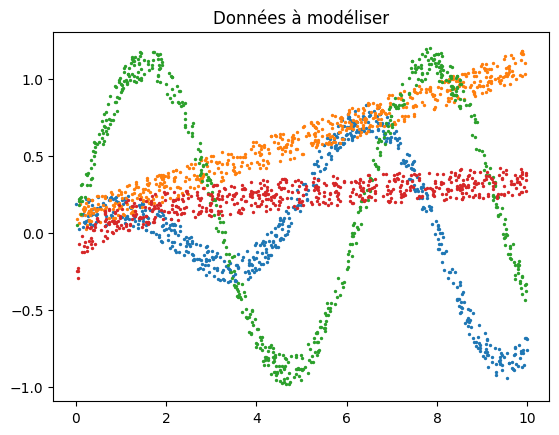

In [ ]:
for a in range(0,100):
  x1 = rd.rand(600)*10
  x2 = rd.rand(600)*10
  x3 = rd.rand(600)*10
  x4 = rd.rand(600)*10
  xcosx = np.array([0.1 * math.cos(i) * i + rd.rand() * 0.2 for i in x1])
  justx = np.array([0.1 * i  + rd.rand() * 0.2 for i in x2])
  sinx =  np.array([0.1 * math.sin(i) * 10+ rd.rand() * 0.2 for i in x3])
  logx = np.array([0.1 * math.log(i)  + rd.rand() * 0.2 for i in x4])
  x_train.append(xcosx)
  x_train.append(sinx)
  x_train.append(logx)
  x_train.append(justx)
  y_train.append(0)
  y_train.append(1)
  y_train.append(2)
  y_train.append(3)
  if a == 50:
    plt.scatter(x1[::1], xcosx[::1], s=2)
    plt.grid()
    plt.scatter(x2[::1], justx[::1], s=2)
    plt.grid()
    plt.scatter(x3[::1], sinx[::1], s=2)
    plt.grid()
    plt.scatter(x4[::1], logx[::1], s=2)
    plt.grid()
    plt.title("Données à modéliser")
    plt.show()

In [ ]:
print(np.shape(x_train))
print(np.shape(y_train))

(400, 600)
(400,)


In [ ]:
# Combine x_train and y_train into a single list of tuples
data = list(zip(x_train, y_train))

# Shuffle the data
rd.shuffle(data)

# Unzip the shuffled data back into x_train and y_train
x_train_shuffled, y_train_shuffled = zip(*data)


x_train = np.array(x_train)
y_train = np.array(y_train)

y_train = to_categorical(y_train)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=18)

# Check the lengths to verify the split
print("Length of x_train:", len(x_train))
print("Length of x_test:", len(x_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

Length of x_train: 320
Length of x_test: 80
Length of y_train: 320
Length of y_test: 80


In [ ]:
# CNN
dense = Sequential()
dense.add(Dense(64, activation="relu", input_dim=1))
dense.add(Dense(64, activation="relu"))
dense.add(Dense(1, activation="linear"))

dense.compile(loss="mse", optimizer="adam")
dense.summary()

# RNN
model = Sequential()
model.add(TimeDistributed(dense, input_shape=(600,1)))  # Adjust input_shape as needed
model.add(TimeDistributed(Flatten()))
model.add(SimpleRNN(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model with appropriate loss function for classification
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Now, you can print the summary of your model
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_crossentropy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 600, 1)            4353      
 ributed)                                                        


In [ ]:
print('---------TRAINING---------')
history = model.fit(x_train, y_train, batch_size = 32, epochs = 200)

---------TRAINING---------
Epoch 1/200
10/10 [==============================] - 5s 218ms/step - loss: 1.3879 - categorical_crossentropy: 1.3879
Epoch 2/200
10/10 [==============================] - 2s 225ms/step - loss: 1.3728 - categorical_crossentropy: 1.3728
Epoch 3/200
10/10 [==============================] - 2s 219ms/step - loss: 1.3584 - categorical_crossentropy: 1.3584
Epoch 4/200
10/10 [==============================] - 2s 192ms/step - loss: 1.3402 - categorical_crossentropy: 1.3402
Epoch 5/200
10/10 [==============================] - 1s 141ms/step - loss: 1.3199 - categorical_crossentropy: 1.3199
Epoch 6/200
10/10 [==============================] - 1s 85ms/step - loss: 1.2961 - categorical_crossentropy: 1.2961
Epoch 7/200
10/10 [==============================] - 1s 85ms/step - loss: 1.2711 - categorical_crossentropy: 1.2711
Epoch 8/200
10/10 [==============================] - 1s 81ms/step - loss: 1.2396 - categorical_crossentropy: 1.2396
Epoch 9/200
10/10 [=====================

---------EVALUATION---------
3/3 [==============================] - 0s 23ms/step - loss: 0.0216 - categorical_crossentropy: 0.0216
Test Loss: 0.021580036729574203
Test Accuracy: 0.021580036729574203


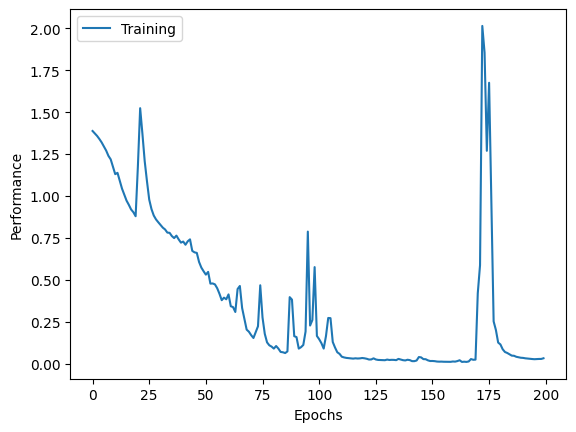

3/3 [==============================] - 0s 22ms/step
[1 2 0 1 0 0 2 2 2 3 2 1 3 1 1 3 2 2 3 2 3 0 0 2 2 2 1 1 2 1 3 1 3 0 0 3 0
 3 0 1 0 1 3 3 0 3 3 3 3 1 0 2 2 0 1 0 0 3 1 3 1 1 2 0 1 2 0 2 1 1 2 1 1 1
 3 1 3 1 2 2]
[1 2 0 1 0 0 2 2 2 3 2 1 3 1 1 3 2 2 3 2 3 0 0 2 2 2 1 1 2 1 3 1 3 0 0 3 0
 3 0 1 0 1 3 3 0 3 3 3 3 1 0 2 2 0 1 0 0 3 1 3 1 1 2 0 1 2 0 2 1 1 2 1 1 1
 3 1 3 1 2 2]
Pourcentage d'erreur: 0.0%


In [ ]:
print('---------EVALUATION---------')
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


# Plot MAE for training and validation
plt.plot(history.history['categorical_crossentropy'], label='Training')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()



predicted_classes = np.argmax(model.predict(x_test), axis=-1)
print(predicted_classes)
y = np.argmax(y_test,axis=1)
print(y)

incorrects = np.nonzero(predicted_classes != y)[0]
print(f"Pourcentage d'erreur: {(incorrects.size/y.size)*100}%")

